In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

In [2]:
def show_image(title, *images):
    for i in range (len(images)):
        #cv2.imshow(title[i], images[i])
        plt.figure(figsize = (20,10), dpi=100)
        plt.title(title[i])
        plt.imshow(images[i], cmap='gray')
        plt.show()
    #cv2.waitKey(0)

def show_image2(title, *images):
    for i in range (len(images)):
        cv2.imshow(title[i], images[i])    
    cv2.waitKey(0)

## Reading Image

In [ ]:
path = '../Data/Resources/Photos/cat.jpg'
img = cv2.imread(path)
show_image2(['cat'], img)

## Resizing and Rescaling

In [ ]:
def rescaleImage(image, scale = 0.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    
    dimension = (width, height)
    
    return cv2.resize(image, dimension, interpolation=cv2.INTER_AREA)

In [ ]:
path = '../Data/Resources/Photos/cat_large.jpg'
img = cv2.imread(path)

resized_image = rescaleImage(img)
show_image2(['cat'], resized_image)

## Draw and Write on Images

In [ ]:
# Creating a black image
blank = np.zeros((500,500,3))

# Green Image
blank[:] = 0,255,0

# red image 
blank[:] = 0,0,255 # BGR type

# Paint the image portion
blank[200:250,250:300] = 255,0,0

show_image2(['Blank'], blank)

In [ ]:
# Drawing the Rectangle
blank = np.zeros((500,500,3))
cv2.rectangle(blank, (0,0), (250,250), (0,255,0), thickness=2)
show_image2(['Rectangle'], blank)

In [ ]:
# Filling the Rectangle
blank = np.zeros((500,500,3))
cv2.rectangle(blank, (0,0), (250,250), (0,255,0), thickness=cv2.FILLED)
show_image2(['Rectangle'], blank)

In [ ]:
# Filling the Rectangle
blank = np.zeros((500,500,3))
cv2.rectangle(blank, (0,0), (250,250), (0,255,0), thickness=cv2.FILLED)
show_image2(['Rectangle'], blank)

In [ ]:
# Filling the Rectangle
blank = np.zeros((500,500,3))
cv2.rectangle(blank, (0,0), (blank.shape[1]//2,blank.shape[0]//2), (0,255,0), thickness=cv2.FILLED)
show_image2(['Rectangle'], blank)

In [ ]:
# Draw a Circle
blank = np.zeros((500,500,3))
cv2.circle(blank, (250,250), 40, (0,255,0), thickness=cv2.FILLED)
show_image2(['Circle'], blank)

In [ ]:
# Draw a Circle
blank = np.zeros((500,500,3)) 
cv2.line(blank, (0,0), (blank.shape[1]//2,blank.shape[0]//2), (255,255,255), thickness=2)
show_image2(['Line'], blank)

In [ ]:
# Write Text 
blank = np.zeros((500,500,3))
cv2.putText(blank, 'Test Message', (125,255), cv2.FONT_HERSHEY_TRIPLEX,1.0,(0,255,0), 2)
show_image2(['Text'], blank)

## Essential Functions in OpenCV

In [ ]:
# Converting to Grayscale
path = '../Data/Resources/Photos/park.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image2('Gray', gray)

In [ ]:
# Blur the Image
blur = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT) #src, kernerl_size=Keep an odd value tuple
show_image2(['Original','Blur'],img, blur)

In [ ]:
# Edge Cascase: Find edges in the image
canny = cv2.Canny(img, 10,400)
show_image2(['Original','Canny'],img, canny) # Note: To reduce the edges Blur the image first

In [ ]:
# Dilate the image: thicken the edges. We need a structuring element which slides over the image and add a pixel on a 'hit'
dilate = cv2.dilate(canny,(7,7), iterations=3) # applying on canny img
show_image2(['Canny','Dilate'],canny, dilate)

In [ ]:
# Erosion: Thining an image. Generally Erosion is followed by Dilation because while reducing edges 
# desired output also sometimes get affected

erosion = cv2.erode(dilate,(9,9), iterations=3) # applying on canny img
show_image2(['Dilate', 'Erode'],dilate,erosion)

In [ ]:
# Resize 
dec_size = cv2.resize(img,(500,500), interpolation=cv2.INTER_AREA) # src, dest_size: It can be any size of pixels, cv2.INTER_AREA: When Decreasing the image size
inc_size = cv2.resize(img,(1280,720), interpolation=cv2.INTER_CUBIC) # cv2.INTER_LINEAR or cv2.INTER_CUBIC: When increasing the size
show_image2(['Original', 'Decreased_Size', 'Increased_Size'],img,dec_size, inc_size)

In [ ]:
# Croping Images
cropped = img[50:200, 200:400]
show_image2(['Orginal','cropped'], img, cropped)

## Image Transformation

In [ ]:
# Converting to Grayscale
path = '../Data/Resources/Photos/park.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image2('Gray', gray)

In [ ]:
# Translating: Move image to up, down, left, right or the combination
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv2.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
# x --> Right
# y --> Down

translated = translate(img, 100, -100)
show_image2(['Original', 'translated'], img, translated)


In [ ]:
# Rotation

def rotate(img, angle, rotPoint=None):  # rotPoint: the point around which we would like to rotate the image. Generally take center
    (height, width) = img.shape[:2]
    
    if rotPoint is None:
        rotPoint = (width//2,height//2)
        
    rotMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)  # Last param= scale 
    dim = (width,height)
    
    return cv2.warpAffine(img, rotMat, dim)


rotated = rotate(img, 45)  # +ve angle = anticlockwise
show_image2(['Original', 'rotated'], img, rotated)

In [ ]:
# Flip
flip = cv2.flip(img, 0)
show_image2(['Original', 'Flip Vertically'], img, flip)

flip = cv2.flip(img, 1)
show_image2(['Original', 'Flip Horizontally'], img, flip)

flip = cv2.flip(img, -1)
show_image2(['Original', 'Flip Vertically & Horizontally'], img, flip)

## Contours Detection

In [ ]:
# Converting to Grayscale
path = '../Data/Resources/Photos/cats.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image2('Gray', gray)

In [ ]:
blank = np.zeros(img.shape, dtype='uint8')  # to draw the contours

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to gray scale

blur = cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)  # Blur Image to reduce the micro edges and hence countours

canny = cv2.Canny(blur, 125, 175)  # use the blured image to detect the edges

# ret, thresh = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)  # Thresholded image could also be used for detecting countours. Not recommended

contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)  
# cv2.RETR_LIST: Return all the countours found
# cv2.RETR_EXTERNAL: Returns external countours
print(f'{len(contours)} contour(s) found!')

# Drawing the detected countours on a blank image with red color, thickness=1
cv2.drawContours(blank, contours, -1, (0,0,255), 1)

show_image2('Detected Countours',blank)

## Bluring

In [4]:
# Converting to Grayscale
path = '../Data/Resources/Photos/cats.jpg'
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image2(['Gray'], img)

In [7]:
# Averaging: Blur the middle bit by taking average of all the surrounding bits
average = cv2.blur(img, (7,7))
show_image2(['Average'], average)

In [9]:
# Gaussian: Blur by taking weighted average
gaussian = cv2.GaussianBlur(img, (7,7), 0)
show_image2(['gaussian','Average'], gaussian, average)

In [11]:
# Median Blur: Blur the middle bit by taking Median of all the surrounding bits. Good for salt and pepper noise
median = cv2.medianBlur(img, 7)
show_image2(['gaussian','Average','median'], gaussian, average,median)

In [12]:
# Bilateral: Preserves the edges
bilateral = cv2.bilateralFilter(img, 10, 35, 35)  # src_img, diameter, sigmaColor=Consider number of neighbour colors , sigmaSpace= Number of pixels to consider from farther space
show_image2(['gaussian','Average','median','bilateral'], gaussian, average, median, bilateral)

## Bitwise Operator

In [3]:
blank = np.zeros((400,400), dtype='uint8')

rectangle = cv2.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv2.circle(blank.copy(), (200,200), 200, 255, -1)

show_image2(['Rectangle','Circle'], rectangle, circle)

In [5]:
# bitwise AND --> intersecting regions
bitwise_and = cv2.bitwise_and(rectangle, circle)
show_image2(['Bitwise AND'], bitwise_and)

In [6]:
# bitwise OR --> non-intersecting and intersecting regions
bitwise_or = cv2.bitwise_or(rectangle, circle)
show_image2(['Bitwise OR'], bitwise_or)

In [8]:
# bitwise XOR --> non-intersecting regions
bitwise_xor = cv2.bitwise_xor(rectangle, circle)
show_image2(['Bitwise XOR'], bitwise_xor)

In [10]:
# bitwise NOT
bitwise_not = cv2.bitwise_not(circle)
show_image2(['Circle NOT'], bitwise_not)

## Masking

In [4]:
import cv2 as cv

img = cv.imread('../Data/Resources/Photos/cats.jpg')
show_image2(['Cats'], img)

In [8]:
blank = np.zeros((img.shape[0],img.shape[1]), dtype='uint8')  # A blank image
circle = cv.circle(blank.copy(), (img.shape[1]//2 + 45,img.shape[0]//2), 100, 255, -1)
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
weird_shape = cv.bitwise_and(circle,rectangle)
show_image2(['Weird Shape'], weird_shape)

In [10]:
masked = cv.bitwise_and(img,img,mask=weird_shape)
show_image2(['Weird Shape Masked'], masked)

## Computing Histogram

In [9]:
img = cv.imread('../Data/Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

circle_mask = cv.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv.bitwise_and(img,img,mask=circle_mask)
cv.imshow('Mask', masked)

cv.waitKey(0)

-1

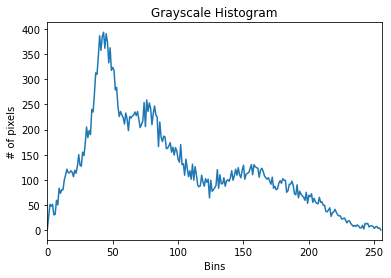

In [17]:
# GRayscale histogram
gray_hist = cv.calcHist([gray], [0], circle_mask, [256], [0,256] )  # Calculating the histogram for circle_mask
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()


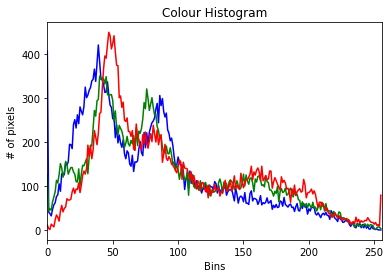

In [8]:
# Colour Histogram
plt.figure()
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], circle_mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

## Edge Detection

In [18]:
import cv2 as cv
import numpy as np

img = cv.imread('../Data/Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Laplacian: More smudged picture
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian', lap)

# Sobel: Calculates edges in X and Y direction
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)
cv.imshow('Combined Sobel', combined_sobel)

canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)
cv.waitKey(0)

-1

## Backup Script
*Note: From Other project*

In [ ]:
def dec_size(img):
    return cv2.resize(img,(1024,1280), interpolation=cv2.INTER_AREA)

In [ ]:
img = cv2.imread(img_path)
img = dec_size(img)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image2(['Gray'], imgray)

In [ ]:
#blur = cv2.GaussianBlur(imgray, (7,7), cv2.BORDER_DEFAULT)
blur = cv2.bilateralFilter(imgray, 5, 1, 1)
#median = cv2.medianBlur(imgray, 9)

canny = cv2.Canny(blur, 150,200)
#ret,thresh = cv2.threshold(imgray,127,255,0)

contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

#show_image(['Canny'], canny)

In [ ]:
hierarchy = hierarchy[0]  #  get the actual inner list of hierarchy descriptions

In [ ]:
# For each contour, find the bounding rectangle and draw it

for component in zip(contours, hierarchy):
    currentContour = component[0]
    currentHierarchy = component[1]
    x,y,w,h = cv2.boundingRect(currentContour)
    
    if currentHierarchy[3] < 0:  # Considering only external countours
        # These are the outermost parent components
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

show_image(['Image'],img)